<a href="https://colab.research.google.com/github/Sohail1173/BankNote_Authentication/blob/main/BankNote_Authentication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import sklearn
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("/content/BankNote_Authentication.csv")

In [3]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.describe(include='all')

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

<Axes: >

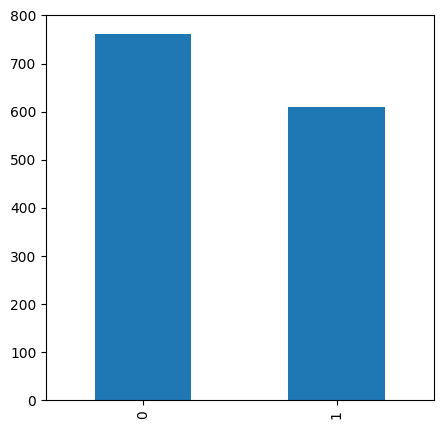

In [7]:
plt.rcParams['figure.figsize'] = [5, 5]
df['class'].value_counts().plot(kind='bar')

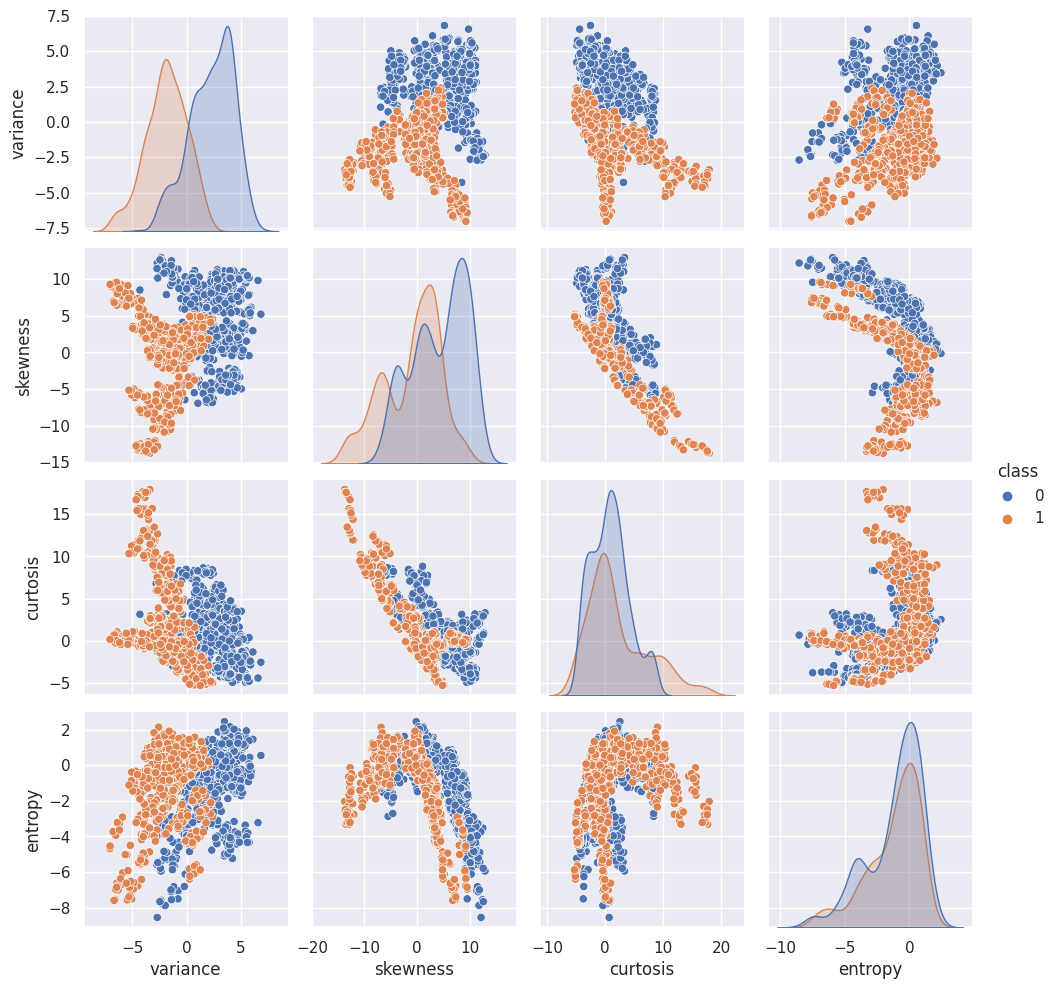

In [8]:
sns.set()
sns.pairplot(df,hue="class")

<ipython-input-9-3721088d944d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


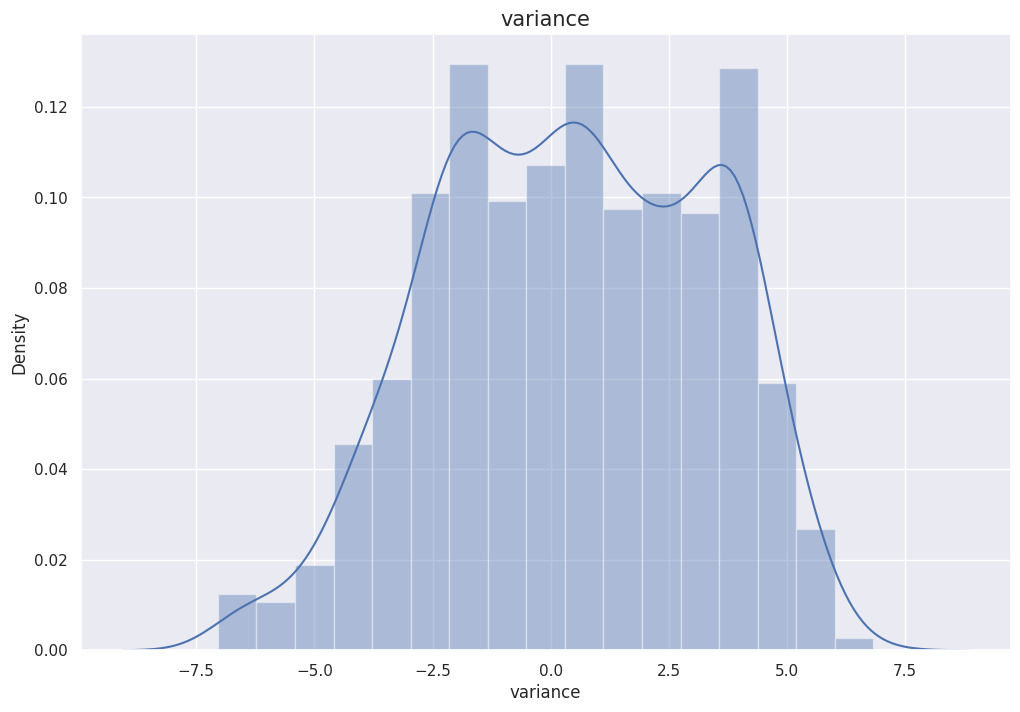

<ipython-input-9-3721088d944d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


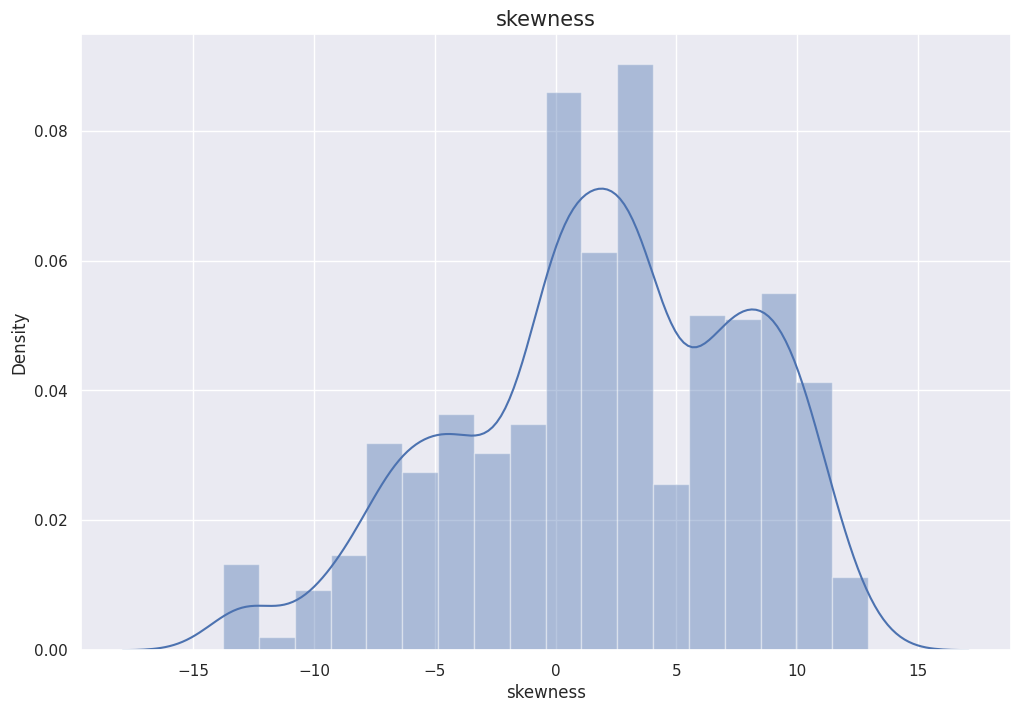

<ipython-input-9-3721088d944d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


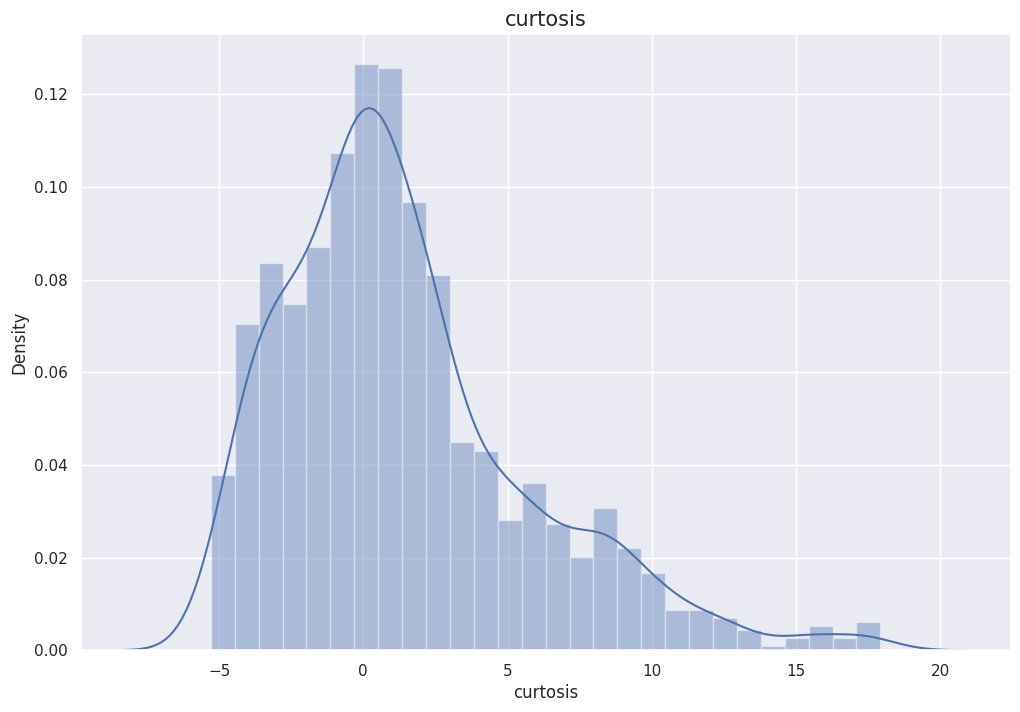

<ipython-input-9-3721088d944d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


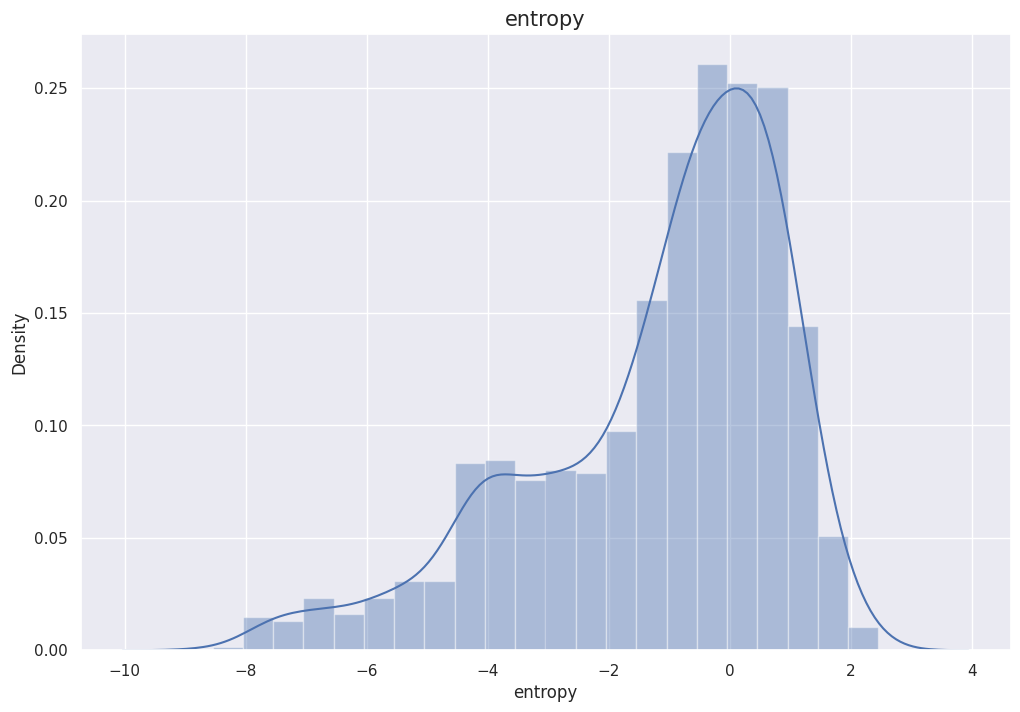

In [9]:
#Plotting the Distribution of Each Variable
for col in df.drop("class", axis=1).columns:
    plt.figure(figsize=(12,8))
    sns.distplot(df[col])
    plt.title(f"{col}", size=15)
    plt.show()

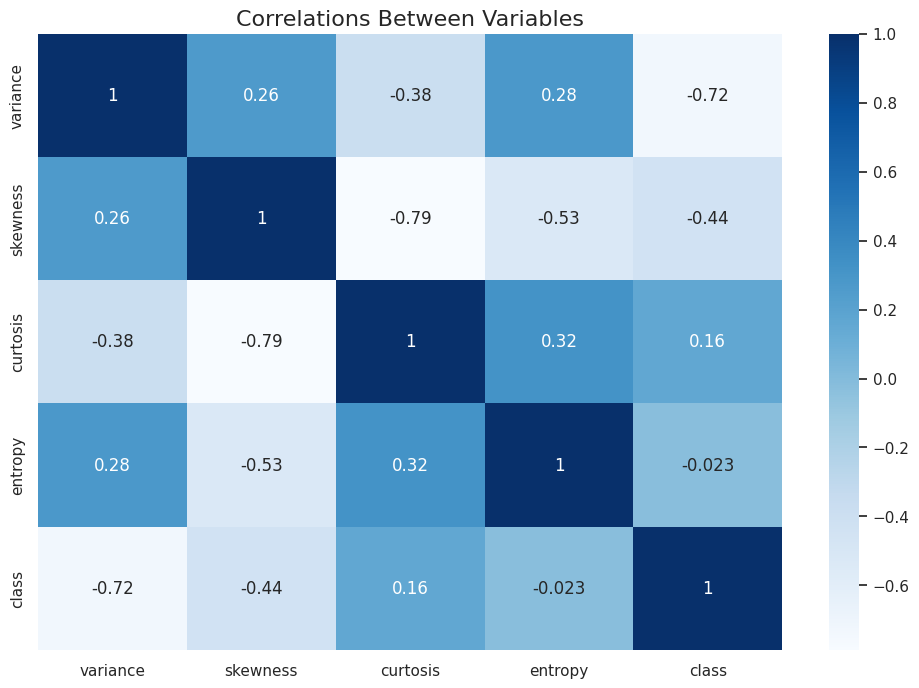

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.title("Correlations Between Variables", size=16)
plt.show()

In [11]:
x, y = df.values[:, :-1], df.values[:, -1]


In [12]:
le = LabelEncoder()
y = le.fit_transform(y)

In [13]:
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)  # 70% training and 30% test

In [14]:
#print the shape of the train and test data values
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(960, 4)
(412, 4)
(960,)
(412,)


In [15]:
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras import Sequential

In [19]:
kerasmodel = Sequential()
kerasmodel.add(Dense(12, activation='relu', input_shape=(x.shape[1],)))
kerasmodel.add(Dense(4, activation='relu'))
kerasmodel.add(Dense(1,activation='sigmoid'))

In [20]:

kerasmodel.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
     


In [21]:
kerasmodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                60        
                                                                 
 dense_4 (Dense)             (None, 4)                 52        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 117
Trainable params: 117
Non-trainable params: 0
_________________________________________________________________


In [22]:
history=kerasmodel.fit(x_train,y_train,batch_size=10,epochs=50,validation_split=0.1)

Epoch 1/50
87/87 [==============================] - 6s 6ms/step - loss: 0.7078 - accuracy: 0.5637 - val_loss: 0.4846 - val_accuracy: 0.7188
Epoch 2/50
87/87 [==============================] - 0s 4ms/step - loss: 0.4175 - accuracy: 0.7731 - val_loss: 0.3796 - val_accuracy: 0.8021
Epoch 3/50
87/87 [==============================] - 0s 4ms/step - loss: 0.3334 - accuracy: 0.8611 - val_loss: 0.3077 - val_accuracy: 0.8750
Epoch 4/50
87/87 [==============================] - 0s 4ms/step - loss: 0.2689 - accuracy: 0.9225 - val_loss: 0.2582 - val_accuracy: 0.9062
Epoch 5/50
87/87 [==============================] - 0s 4ms/step - loss: 0.2242 - accuracy: 0.9479 - val_loss: 0.2227 - val_accuracy: 0.9479
Epoch 6/50
87/87 [==============================] - 0s 4ms/step - loss: 0.1537 - accuracy: 0.9664 - val_loss: 0.1356 - val_accuracy: 0.9688
Epoch 7/50
87/87 [==============================] - 0s 4ms/step - loss: 0.1047 - accuracy: 0.9780 - val_loss: 0.0987 - val_accuracy: 0.9792
Epoch 8/50
87/87 [==

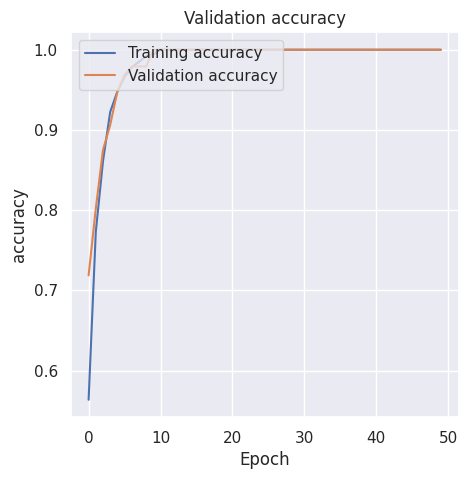

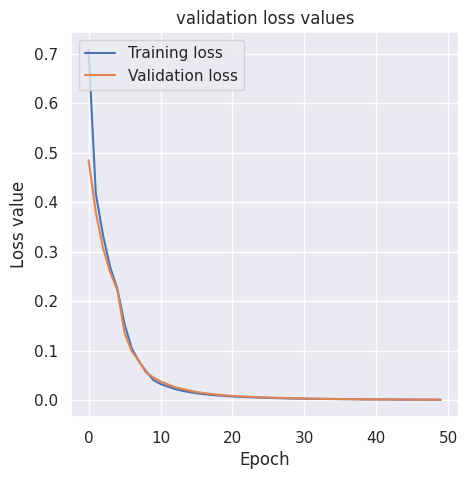

In [32]:

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [33]:
#train accuracy
_,accuracy=kerasmodel.evaluate(x_train,y_train)
print('The train accuracy:%2f' % (accuracy*100))

30/30 [==============================] - 0s 7ms/step - loss: 8.5547e-04 - accuracy: 1.0000
The train accuracy:100.000000


In [35]:
loss = kerasmodel.evaluate(x_test, y_test)
print(loss)

13/13 [==============================] - 0s 6ms/step - loss: 8.1431e-04 - accuracy: 1.0000
[0.0008143121376633644, 1.0]


In [45]:
from sklearn.metrics import accuracy_score

y_pred = (kerasmodel.predict(x_test) > 0.5).astype("int32")
accuracy_score(y_test,y_pred)

13/13 [==============================] - 0s 2ms/step


1.0

In [46]:
classification_report(y_test,y_pred.round())

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       229\n           1       1.00      1.00      1.00       183\n\n    accuracy                           1.00       412\n   macro avg       1.00      1.00      1.00       412\nweighted avg       1.00      1.00      1.00       412\n'

In [ ]:
#accuracy is good considering very less numbers of examples are available in Training sets.